<a href="https://colab.research.google.com/github/RifkiSstwnn/22_Rifki-Setiawan_PCVK_Sem5_2024/blob/main/Rifki%20Setiawan_22_3H_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 mengubah tingkat kecerahan citra 
----------------------------------
masukkan nilai kecerahan: 55


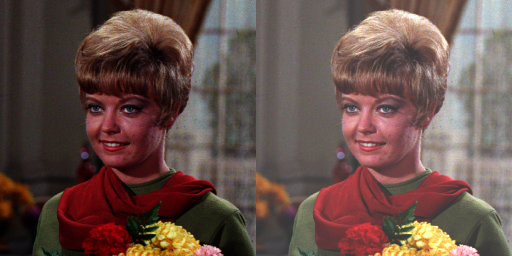

In [ ]:
print(' mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Menentukan konstanta c
c = 255 / np.log(1 + np.max(original))

# create an empty array with the same shape and type as the original image
brightness_image = np.zeros_like(original)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c]+brightness,0,255)

#cara simple tanpa loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original,brightness_image])
cv2_imshow(final_frame)

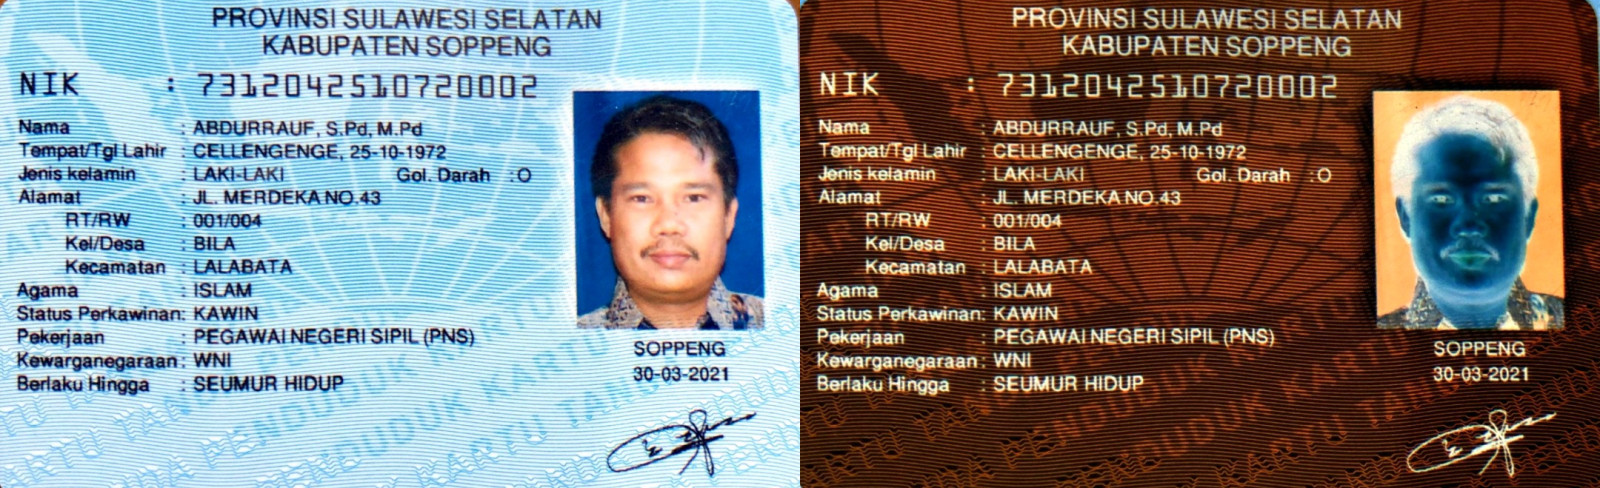

In [ ]:
# Membaca citra
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')

# Membalikkan nilai pixel
inverted_image = 255 - original

# Menampilkan citra asli dan citra negatif
final_frame = cv.hconcat((original, inverted_image))

# Menampilkan hasil
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
----------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 255
Masukkan tingkat kontras [1.0 - 3.0]: 3


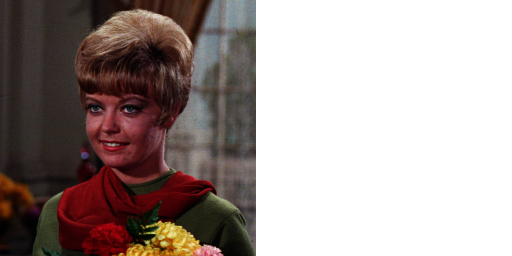

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------------')

# Input brightness and contrast values
brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
kontras = float(input('Masukkan tingkat kontras [1.0 - 3.0]: '))

# Membaca citra
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Konversi citra ke tipe data float untuk mencegah overflow/underflow
float_image = original.astype(np.float32)

# Membuat array kosong untuk citra yang disesuaikan
adjusted_image = np.zeros_like(float_image)

# Mengakses setiap piksel dan menerapkan transformasi
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Terapkan formula kontras dan kecerahan
            adjusted_value = kontras * float_image[y, x, c] + brightness
            # Pastikan nilai piksel berada dalam rentang [0, 255]
            adjusted_image[y, x, c] = np.clip(adjusted_value, 0, 255)

# Konversi kembali ke tipe data uint8
adjusted_image = adjusted_image.astype(np.uint8)

# Menampilkan citra asli dan citra yang disesuaikan
final_frame = cv.hconcat([original, adjusted_image])
cv2_imshow(final_frame)


Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------
Masukkan nilai kecerahan: 55


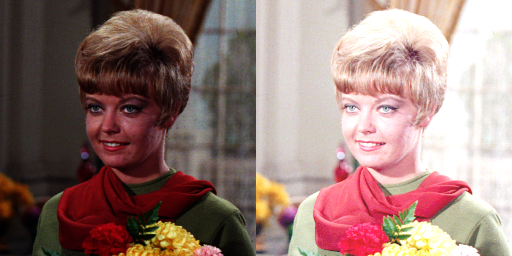

In [5]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------')

# Input brightness value
brightness = float(input('Masukkan nilai kecerahan: '))

image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Create an empty array with the same shape as the original image
log_transformed = np.zeros_like(image)

# Apply the log transformation to each pixel
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            # Apply log transformation and add brightness
            log_transformed[y, x, c] = np.clip(brightness * np.log1p(image[y, x, c]),0,255)

# Menggabungkan gambar asli dan gambar hasil transformasi logaritmik secara horizontal
final_frame = cv.hconcat([image.astype(np.uint8), log_transformed])

# Menampilkan hasil
cv2_imshow(final_frame)
